# **Project : Expense Tracker and Budget Planner**
## **Objective: Develop a tool to categorize and track expenses, assist in budgeting, and provide insights into spending habits.**


### **Algorithms Used:**

 *   K-Means Clustering: For categorizing expenses.
 *   Gradient Boosting Regression: For predicting future expenses.

### **Technologies :**

*   Python: Programming language.
*   Pandas: Data manipulation.
*   Matplotlib: Data visualization.



### **Importing all the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### **Load and preprocess data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/personal_transactions.csv')
df.head()

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card


In [4]:
df.shape

(806, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              806 non-null    object 
 1   Description       806 non-null    object 
 2   Amount            806 non-null    float64
 3   Transaction Type  806 non-null    object 
 4   Category          806 non-null    object 
 5   Account Name      806 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.9+ KB


In [6]:
df.describe()

,Amount
count,806.000000
mean,273.391489
std,667.630374
min,1.750000
25%,15.687500
50%,37.480000
75%,117.680000
max,9200.000000


In [7]:
df.isnull().sum()

Date                0
Description         0
Amount              0
Transaction Type    0
Category            0
Account Name        0
dtype: int64

**Dropping rows that have 'Transaction Type' 'credit' as we only want expenses**

In [8]:
df.drop(df[df['Transaction Type'] == 'credit'].index, inplace = True)

In [9]:
df.head(10)

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card
5,01/05/2018,American Tavern,25.85,debit,Restaurants,Silver Card
6,01/06/2018,Hardware Store,18.45,debit,Home Improvement,Silver Card
7,01/08/2018,Gas Company,45.00,debit,Utilities,Checking
8,01/08/2018,Hardware Store,15.38,debit,Home Improvement,Silver Card
9,01/09/2018,Spotify,10.69,debit,Music,Platinum Card
10,01/10/2018,Phone Company,89.46,debit,Mobile Phone,Checking


In [10]:
# Drop rows that have Category 'Credit Card Payment'
df.drop(df[df['Category'] == 'Credit Card Payment'].index, inplace = True)

**Handling Outliers**

In [11]:
# Calculate quartiles and IQR
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

# Display outliers
print(outliers.count())
outliers

Date                33
Description         33
Amount              33
Transaction Type    33
Category            33
Account Name        33
dtype: int64


,Date,Description,Amount,Transaction Type,Category,Account Name
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
34,02/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
67,03/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
115,04/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
142,04/24/2018,Hardware Store,224.70,debit,Home Improvement,Platinum Card
144,04/25/2018,Hardware Store,210.79,debit,Home Improvement,Silver Card
157,05/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
164,05/06/2018,Amazon,117.69,debit,Shopping,Platinum Card
172,05/11/2018,Mike's Construction Co.,8000.00,debit,Home Improvement,Checking
204,06/04/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking


In [12]:
# Remove outliers
df = df[~((df['Amount'] < lower_bound) | (df['Amount'] > upper_bound))]

In [13]:
df.head()

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card
5,01/05/2018,American Tavern,25.85,debit,Restaurants,Silver Card
6,01/06/2018,Hardware Store,18.45,debit,Home Improvement,Silver Card


In [14]:
# Removing Unnecessary Columns
df.drop(['Transaction Type'], axis=1, inplace=True)

**Indexing in correct order**

In [15]:
df.index = np.arange(0, len(df))

In [16]:
df.head()

,Date,Description,Amount,Category,Account Name
0,01/01/2018,Amazon,11.11,Shopping,Platinum Card
1,01/02/2018,Thai Restaurant,24.22,Restaurants,Silver Card
2,01/04/2018,Netflix,11.76,Movies & DVDs,Platinum Card
3,01/05/2018,American Tavern,25.85,Restaurants,Silver Card
4,01/06/2018,Hardware Store,18.45,Home Improvement,Silver Card


In [17]:
df.shape

(584, 5)

In [18]:
df.dtypes

Date             object
Description      object
Amount          float64
Category         object
Account Name     object
dtype: object

**Changing date format from object to date and time**

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date            datetime64[ns]
Description             object
Amount                 float64
Category                object
Account Name            object
dtype: object

In [20]:
df.head()

,Date,Description,Amount,Category,Account Name
0,2018-01-01,Amazon,11.11,Shopping,Platinum Card
1,2018-01-02,Thai Restaurant,24.22,Restaurants,Silver Card
2,2018-01-04,Netflix,11.76,Movies & DVDs,Platinum Card
3,2018-01-05,American Tavern,25.85,Restaurants,Silver Card
4,2018-01-06,Hardware Store,18.45,Home Improvement,Silver Card


In [21]:
new_df = df.copy()

### **Data Visualisation : Visualising Expense Trends**

Text(0, 0.5, 'Total Amount')

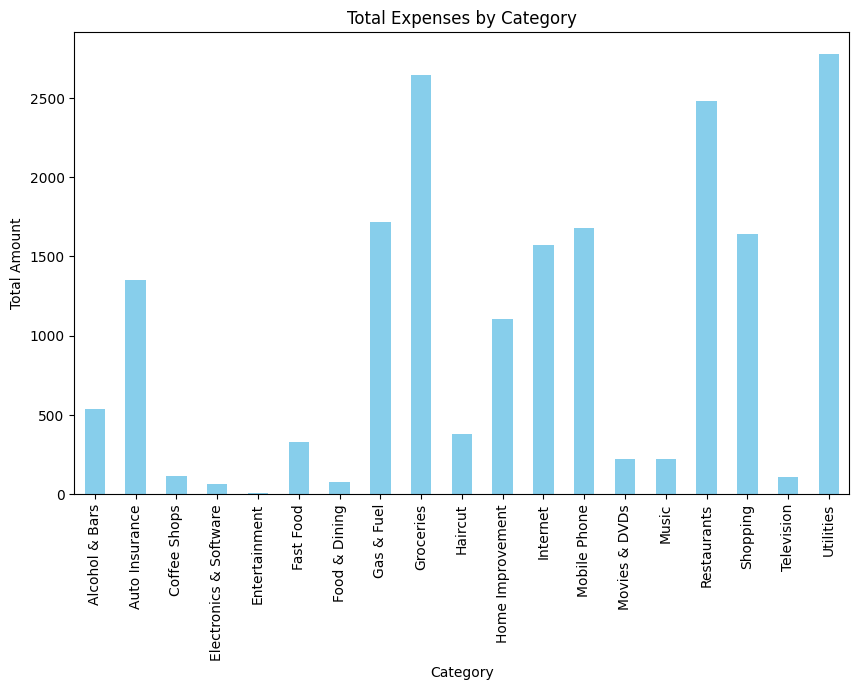

In [22]:
# Calculate total expenses per category
expenses_summary = df.groupby('Category')['Amount'].sum()

# Plotting expenses using bar chart
plt.figure(figsize=(10, 6))
expenses_summary.plot(kind='bar', color='skyblue')
plt.title('Total Expenses by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')

(-1.0999999999990133,
 1.0999999999996515,
 -1.0999999976942476,
 1.0999999515912164)

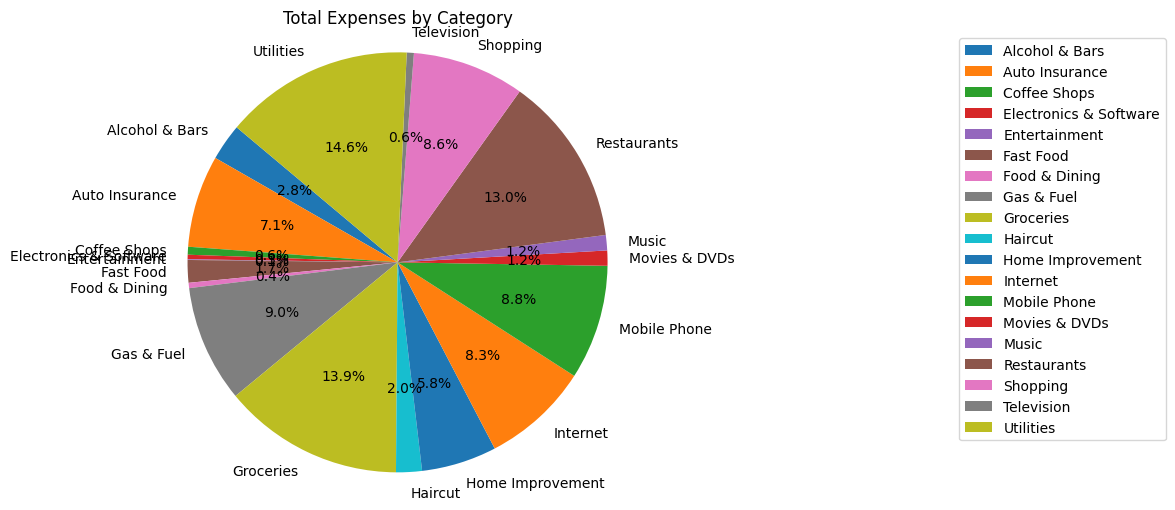

In [23]:
# Plotting expenses using pie chart
plt.figure(figsize=(10, 6))
plt.pie(expenses_summary, labels=expenses_summary.index, autopct='%1.1f%%', startangle=140)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.title('Total Expenses by Category')
plt.axis('equal')

### **K-Means Clustering for Expense Categorization**

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Amount']])

# Define categories based on clusters
categories = {
    0: 'Low Expense',
    1: 'Medium Expense',
    2: 'High Expense'
}

df['Cluster_Category'] = df['Cluster'].map(categories)

# Display categorized expenses
df.head(10)

,Date,Description,Amount,Category,Account Name,Cluster,Cluster_Category
0,2018-01-01,Amazon,11.11,Shopping,Platinum Card,0,Low Expense
1,2018-01-02,Thai Restaurant,24.22,Restaurants,Silver Card,2,High Expense
2,2018-01-04,Netflix,11.76,Movies & DVDs,Platinum Card,0,Low Expense
3,2018-01-05,American Tavern,25.85,Restaurants,Silver Card,2,High Expense
4,2018-01-06,Hardware Store,18.45,Home Improvement,Silver Card,0,Low Expense
5,2018-01-08,Gas Company,45.00,Utilities,Checking,2,High Expense
6,2018-01-08,Hardware Store,15.38,Home Improvement,Silver Card,0,Low Expense
7,2018-01-09,Spotify,10.69,Music,Platinum Card,0,Low Expense
8,2018-01-10,Phone Company,89.46,Mobile Phone,Checking,1,Medium Expense
9,2018-01-11,Shell,34.87,Gas & Fuel,Platinum Card,2,High Expense


**Plotting cluster_category in pie chart**

Text(0.5, 1.0, 'Cluster Category')

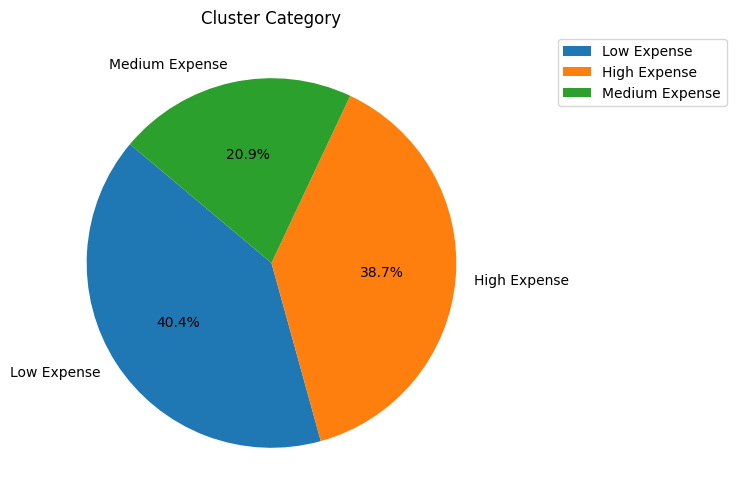

In [25]:
plt.figure(figsize=(10, 6))
plt.pie(df['Cluster_Category'].value_counts(), labels=df['Cluster_Category'].unique(), autopct='%1.1f%%', startangle=140)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.title('Cluster Category')

### **Budgeting Insights**

In [26]:
df['Category'].unique()

array(['Shopping', 'Restaurants', 'Movies & DVDs', 'Home Improvement',
       'Utilities', 'Music', 'Mobile Phone', 'Gas & Fuel', 'Groceries',
       'Fast Food', 'Coffee Shops', 'Internet', 'Haircut',
       'Alcohol & Bars', 'Auto Insurance', 'Entertainment',
       'Food & Dining', 'Television', 'Electronics & Software'],
      dtype=object)

In [27]:
# Extract month and year for grouping
df['Month_Year'] = df['Date'].dt.to_period('M')
df.head()

,Date,Description,Amount,Category,Account Name,Cluster,Cluster_Category,Month_Year
0,2018-01-01,Amazon,11.11,Shopping,Platinum Card,0,Low Expense,2018-01
1,2018-01-02,Thai Restaurant,24.22,Restaurants,Silver Card,2,High Expense,2018-01
2,2018-01-04,Netflix,11.76,Movies & DVDs,Platinum Card,0,Low Expense,2018-01
3,2018-01-05,American Tavern,25.85,Restaurants,Silver Card,2,High Expense,2018-01
4,2018-01-06,Hardware Store,18.45,Home Improvement,Silver Card,0,Low Expense,2018-01


In [28]:
monthly_budget = {
    'Shopping': 100,
    'Restaurants': 150,
    'Movies & DVDs': 0,
    'Home Improvement': 250,
    'Utilities': 150,
    'Music': 11,
    'Mobile Phone': 65,
    'Gas & Fuel': 75,
    'Groceries': 150,
    'Fast Food': 15,
    'Coffee Shops': 15,
    'Internet': 75,
    'Haircut' : 30,
    'Alcohols & Bars' : 50,
    'Auto Insurance' : 75,
    'Entertainment' : 25,
    'Food & Dining' : 100,
    'Television' : 15,
    'Electronics & Software' : 0
}

In [29]:
# Group by Month_Year and Category and calculate total spending
monthly_expenses = df.groupby(['Month_Year', 'Category'])['Amount'].sum().reset_index()

# Display monthly expenses
monthly_expenses.head(10)

,Month_Year,Category,Amount
0,2018-01,Coffee Shops,3.00
1,2018-01,Fast Food,32.91
2,2018-01,Gas & Fuel,65.29
3,2018-01,Groceries,87.73
4,2018-01,Home Improvement,51.21
5,2018-01,Internet,69.99
6,2018-01,Mobile Phone,89.46
7,2018-01,Movies & DVDs,11.76
8,2018-01,Music,10.69
9,2018-01,Restaurants,156.80


In [30]:
# Compare spending against the budget and identify overspending
budget_insights = []

for _, row in monthly_expenses.iterrows():
    category = row['Category']
    month_year = row['Month_Year']
    total_spent = row['Amount']
    budget = monthly_budget.get(category, 0)

    if total_spent > budget:
        overspent = total_spent - budget
        budget_insights.append((month_year, category, total_spent, budget, overspent, 'Over Budget'))
    else:
        underspent = budget - total_spent
        budget_insights.append((month_year, category, total_spent, budget, underspent, 'Within Budget'))

# Convert budget insights to DataFrame
budget_insights_df = pd.DataFrame(budget_insights, columns=['Month_Year', 'Category', 'Total_Spent', 'Budget', 'Difference', 'Status'])

# Display budget insights
budget_insights_df.head(30)

,Month_Year,Category,Total_Spent,Budget,Difference,Status
0,2018-01,Coffee Shops,3.00,15,12.00,Within Budget
1,2018-01,Fast Food,32.91,15,17.91,Over Budget
2,2018-01,Gas & Fuel,65.29,75,9.71,Within Budget
3,2018-01,Groceries,87.73,150,62.27,Within Budget
4,2018-01,Home Improvement,51.21,250,198.79,Within Budget
5,2018-01,Internet,69.99,75,5.01,Within Budget
6,2018-01,Mobile Phone,89.46,65,24.46,Over Budget
7,2018-01,Movies & DVDs,11.76,0,11.76,Over Budget
8,2018-01,Music,10.69,11,0.31,Within Budget
9,2018-01,Restaurants,156.80,150,6.80,Over Budget


**Plotting pie chart for each month**

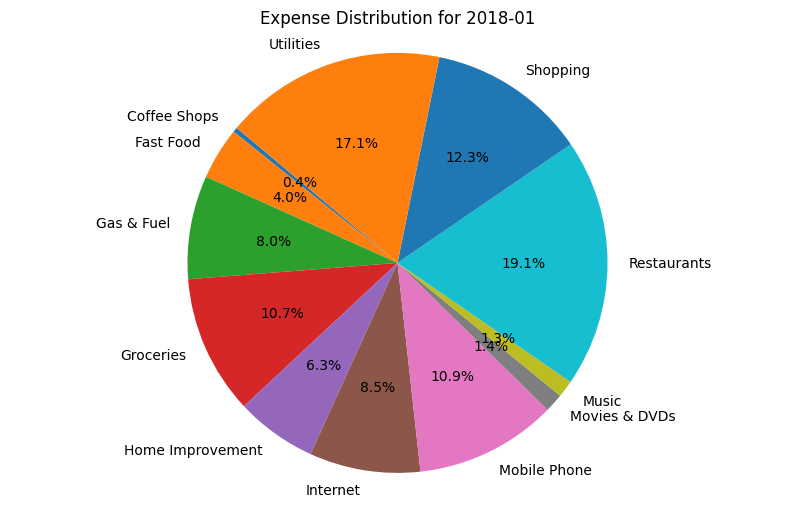

Budget Insights for 2018-01
Coffee Shops: within budget
Fast Food: $17.91 over budget
Gas & Fuel: within budget
Groceries: within budget
Home Improvement: within budget
Internet: within budget
Mobile Phone: $24.46 over budget
Movies & DVDs: $11.76 over budget
Music: within budget
Restaurants: $6.80 over budget
Shopping: $0.37 over budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $236.79




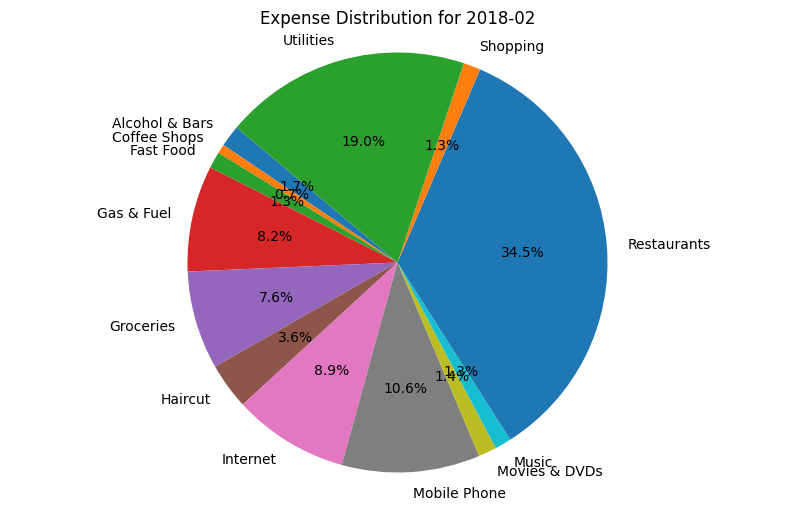

Budget Insights for 2018-02
Alcohol & Bars: $14.00 over budget
Coffee Shops: within budget
Fast Food: within budget
Gas & Fuel: within budget
Groceries: within budget
Haircut: within budget
Internet: within budget
Mobile Phone: $24.52 over budget
Movies & DVDs: $11.76 over budget
Music: within budget
Restaurants: $140.85 over budget
Shopping: within budget
Utilities: $10.00 over budget
Overall: Over budget
Extra Amount spent: $6.00




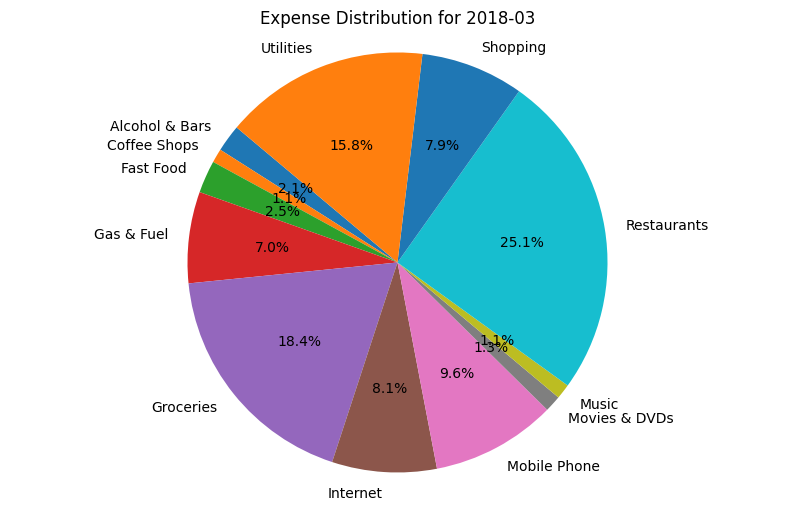

Budget Insights for 2018-03
Alcohol & Bars: $19.50 over budget
Coffee Shops: within budget
Fast Food: $8.34 over budget
Gas & Fuel: within budget
Groceries: $21.07 over budget
Internet: within budget
Mobile Phone: $24.52 over budget
Movies & DVDs: $11.76 over budget
Music: within budget
Restaurants: $84.05 over budget
Shopping: within budget
Utilities: within budget
Overall: Over budget
Extra Amount spent: $125.22




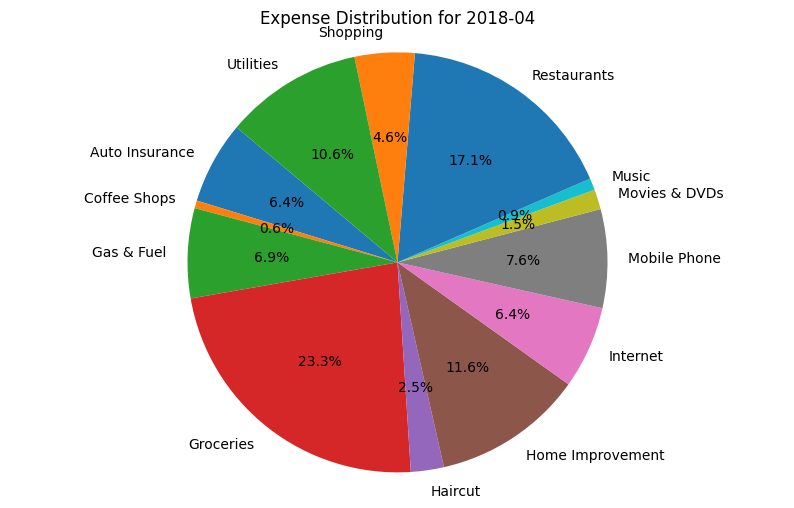

Budget Insights for 2018-04
Auto Insurance: within budget
Coffee Shops: within budget
Gas & Fuel: $6.56 over budget
Groceries: $124.39 over budget
Haircut: within budget
Home Improvement: within budget
Internet: within budget
Mobile Phone: $24.52 over budget
Movies & DVDs: $18.17 over budget
Music: within budget
Restaurants: $52.27 over budget
Shopping: within budget
Utilities: within budget
Overall: Over budget
Extra Amount spent: $33.73




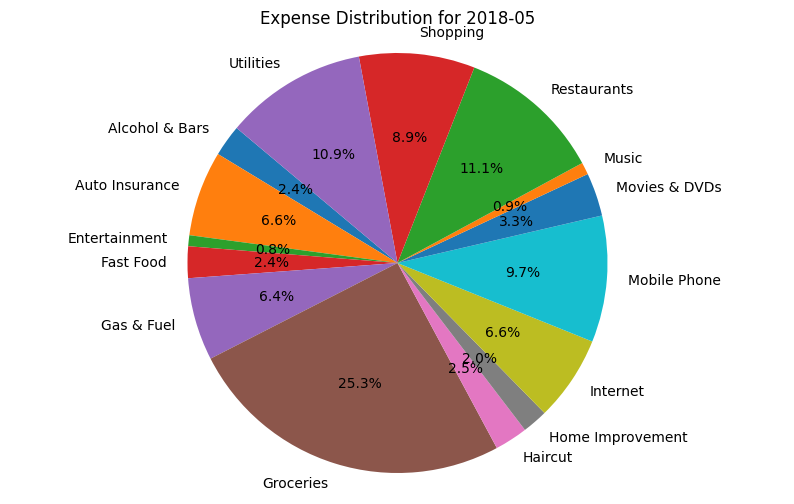

Budget Insights for 2018-05
Alcohol & Bars: $27.77 over budget
Auto Insurance: within budget
Entertainment: within budget
Fast Food: $12.79 over budget
Gas & Fuel: within budget
Groceries: $139.21 over budget
Haircut: within budget
Home Improvement: within budget
Internet: within budget
Mobile Phone: $46.18 over budget
Movies & DVDs: $38.01 over budget
Music: within budget
Restaurants: within budget
Shopping: $1.76 over budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $28.57




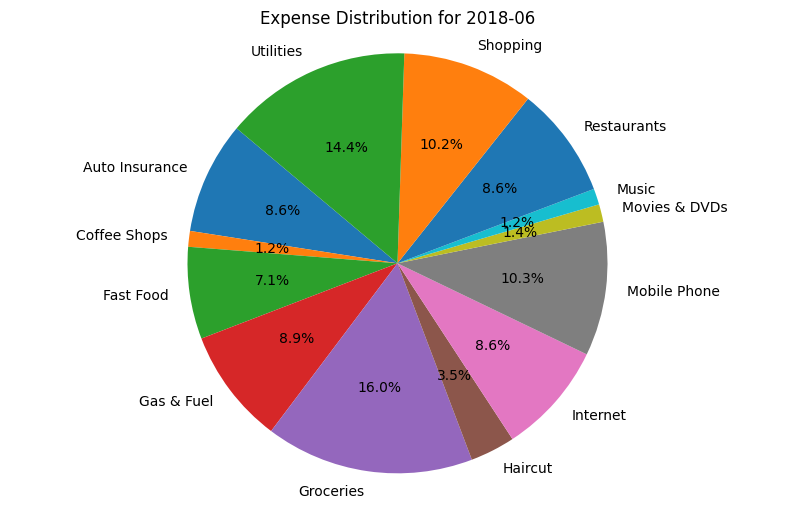

Budget Insights for 2018-06
Auto Insurance: within budget
Coffee Shops: within budget
Fast Food: $46.50 over budget
Gas & Fuel: $2.15 over budget
Groceries: within budget
Haircut: within budget
Internet: within budget
Mobile Phone: $24.46 over budget
Movies & DVDs: $11.76 over budget
Music: within budget
Restaurants: within budget
Shopping: within budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $43.39




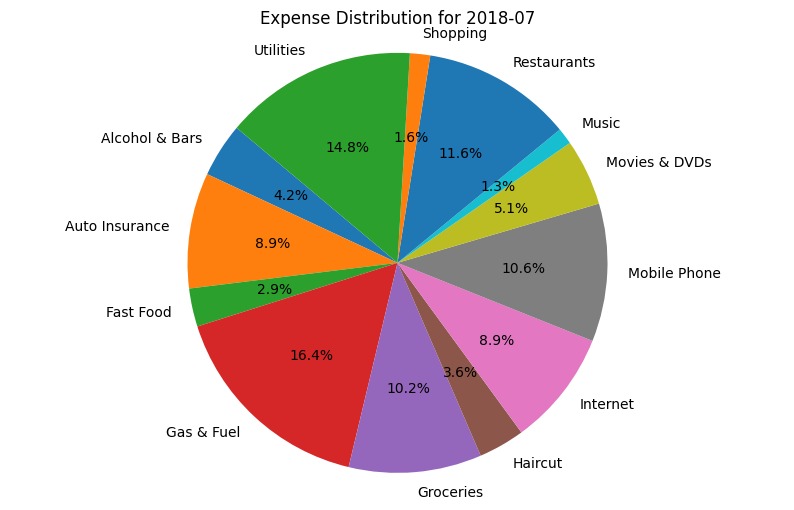

Budget Insights for 2018-07
Alcohol & Bars: $35.14 over budget
Auto Insurance: within budget
Fast Food: $9.81 over budget
Gas & Fuel: $62.90 over budget
Groceries: within budget
Haircut: within budget
Internet: within budget
Mobile Phone: $24.46 over budget
Movies & DVDs: $43.17 over budget
Music: within budget
Restaurants: within budget
Shopping: within budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $53.12




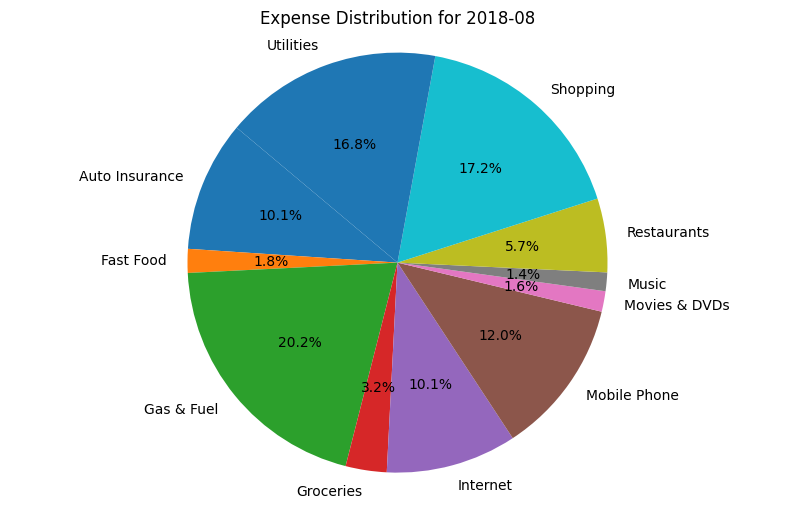

Budget Insights for 2018-08
Auto Insurance: within budget
Fast Food: within budget
Gas & Fuel: $75.82 over budget
Groceries: within budget
Internet: within budget
Mobile Phone: $24.40 over budget
Movies & DVDs: $11.76 over budget
Music: within budget
Restaurants: within budget
Shopping: $28.05 over budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $120.76




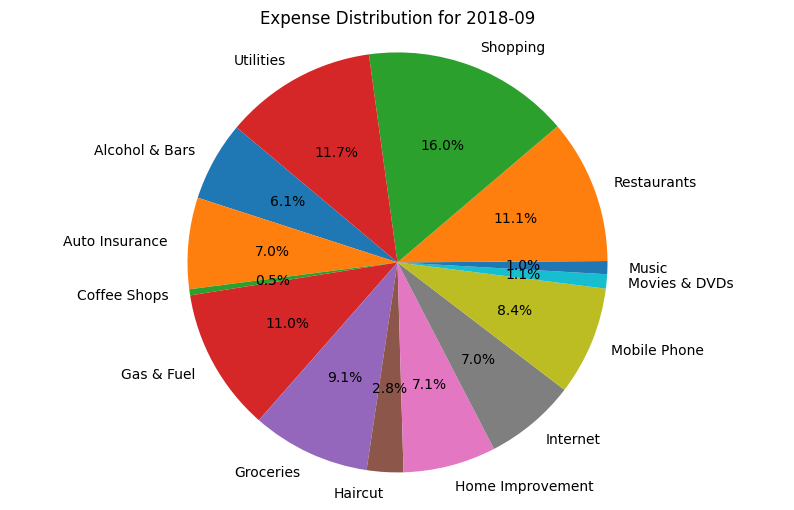

Budget Insights for 2018-09
Alcohol & Bars: $65.40 over budget
Auto Insurance: within budget
Coffee Shops: within budget
Gas & Fuel: $42.57 over budget
Groceries: within budget
Haircut: within budget
Home Improvement: within budget
Internet: within budget
Mobile Phone: $24.40 over budget
Movies & DVDs: $11.76 over budget
Music: within budget
Restaurants: within budget
Shopping: $70.34 over budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $78.70




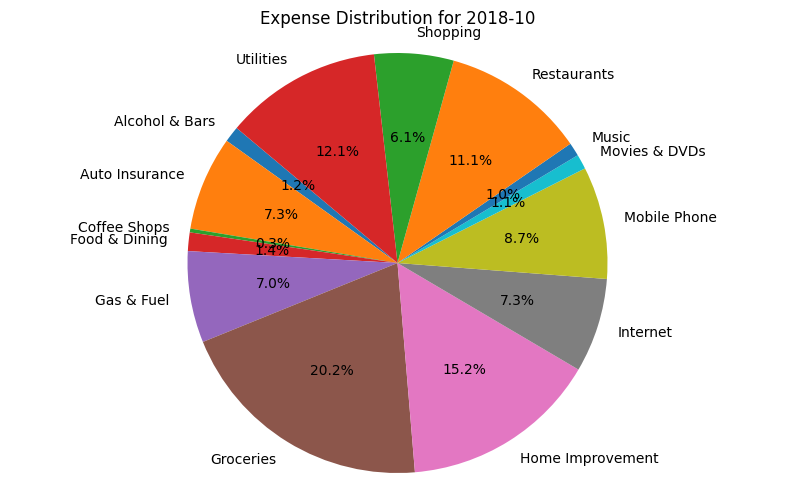

Budget Insights for 2018-10
Alcohol & Bars: $12.71 over budget
Auto Insurance: within budget
Coffee Shops: within budget
Food & Dining: within budget
Gas & Fuel: within budget
Groceries: $58.59 over budget
Home Improvement: within budget
Internet: within budget
Mobile Phone: $24.40 over budget
Movies & DVDs: $11.76 over budget
Music: within budget
Restaurants: within budget
Shopping: within budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $182.81




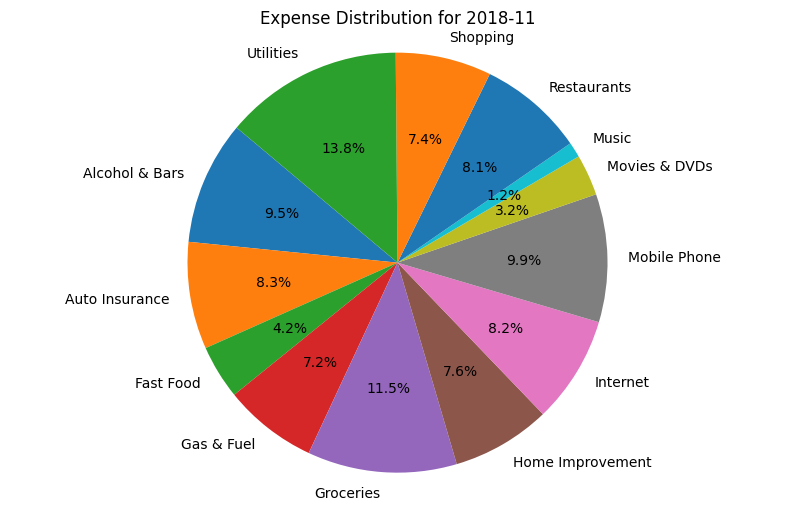

Budget Insights for 2018-11
Alcohol & Bars: $86.60 over budget
Auto Insurance: within budget
Fast Food: $22.85 over budget
Gas & Fuel: within budget
Groceries: within budget
Home Improvement: within budget
Internet: within budget
Mobile Phone: $24.54 over budget
Movies & DVDs: $28.76 over budget
Music: within budget
Restaurants: within budget
Shopping: within budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $207.03




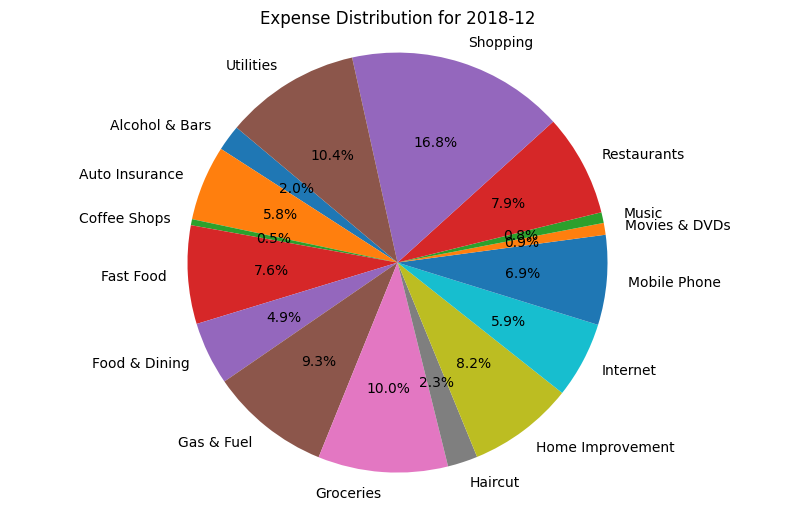

Budget Insights for 2018-12
Alcohol & Bars: $26.00 over budget
Auto Insurance: within budget
Coffee Shops: within budget
Fast Food: $83.10 over budget
Food & Dining: within budget
Gas & Fuel: $45.37 over budget
Groceries: within budget
Haircut: within budget
Home Improvement: within budget
Internet: $0.99 over budget
Mobile Phone: $24.54 over budget
Movies & DVDs: $11.76 over budget
Music: within budget
Restaurants: within budget
Shopping: $117.14 over budget
Utilities: within budget
Overall: Over budget
Extra Amount spent: $34.61




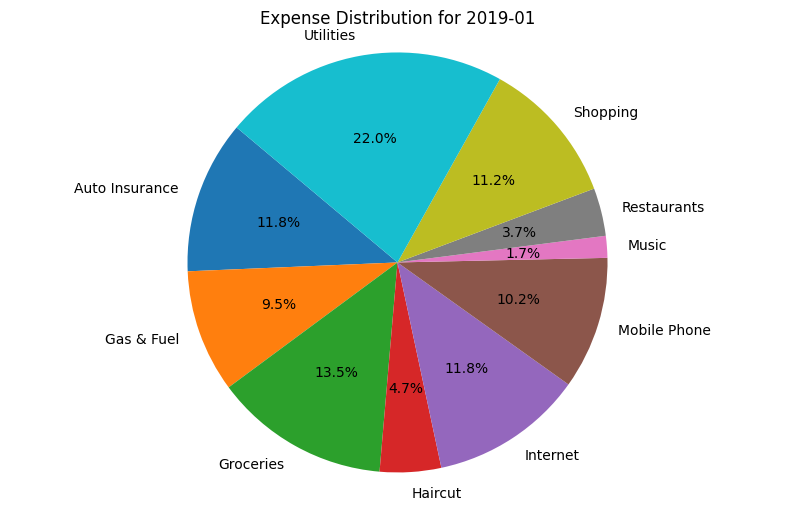

Budget Insights for 2019-01
Auto Insurance: within budget
Gas & Fuel: within budget
Groceries: within budget
Haircut: within budget
Internet: within budget
Mobile Phone: within budget
Music: within budget
Restaurants: within budget
Shopping: within budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $244.57




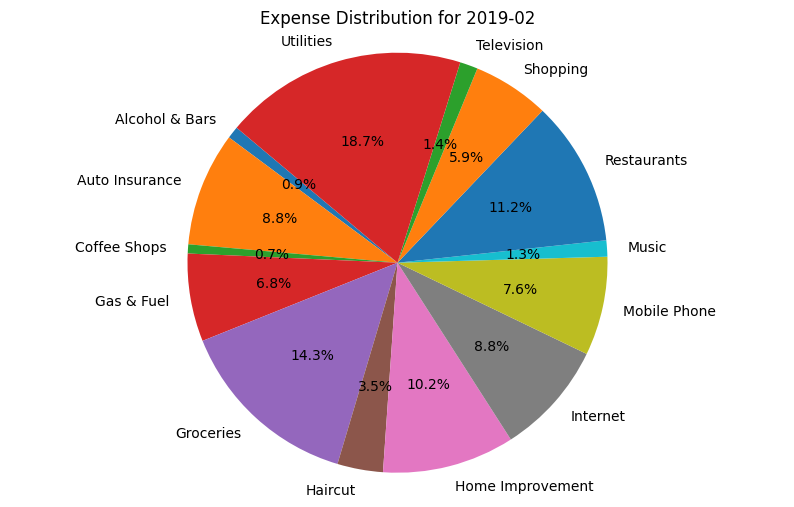

Budget Insights for 2019-02
Alcohol & Bars: $8.00 over budget
Auto Insurance: within budget
Coffee Shops: within budget
Gas & Fuel: within budget
Groceries: within budget
Haircut: within budget
Home Improvement: within budget
Internet: within budget
Mobile Phone: within budget
Music: within budget
Restaurants: within budget
Shopping: within budget
Television: within budget
Utilities: $10.00 over budget
Overall: Within budget
Remaining Amount: $306.40




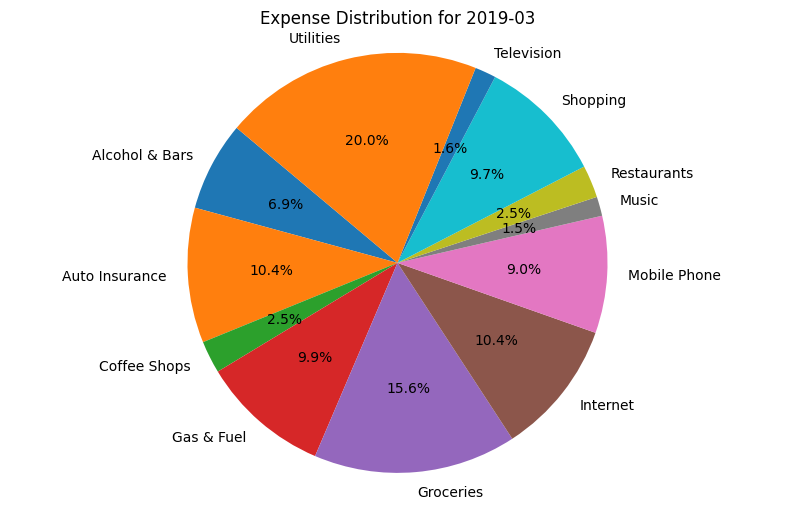

Budget Insights for 2019-03
Alcohol & Bars: $49.63 over budget
Auto Insurance: within budget
Coffee Shops: $3.04 over budget
Gas & Fuel: within budget
Groceries: within budget
Internet: within budget
Mobile Phone: within budget
Music: within budget
Restaurants: within budget
Shopping: within budget
Television: within budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $159.40




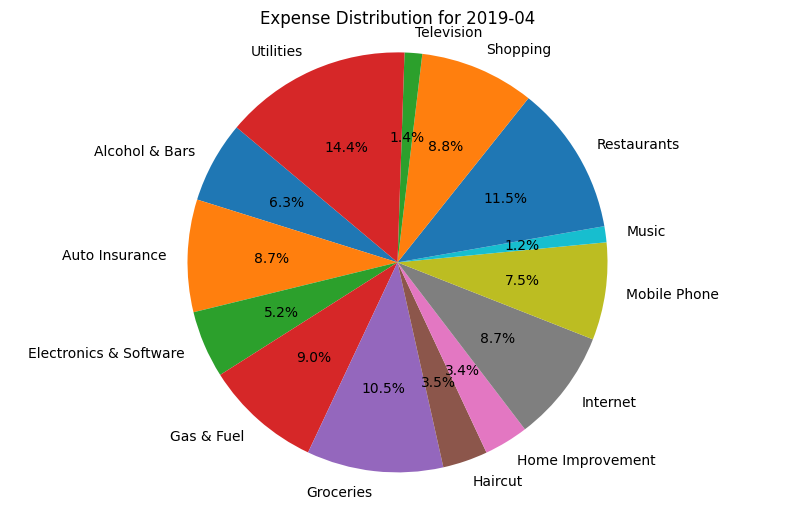

Budget Insights for 2019-04
Alcohol & Bars: $54.40 over budget
Auto Insurance: within budget
Electronics & Software: $44.93 over budget
Gas & Fuel: $3.02 over budget
Groceries: within budget
Haircut: within budget
Home Improvement: within budget
Internet: within budget
Mobile Phone: within budget
Music: within budget
Restaurants: within budget
Shopping: within budget
Television: within budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $279.13




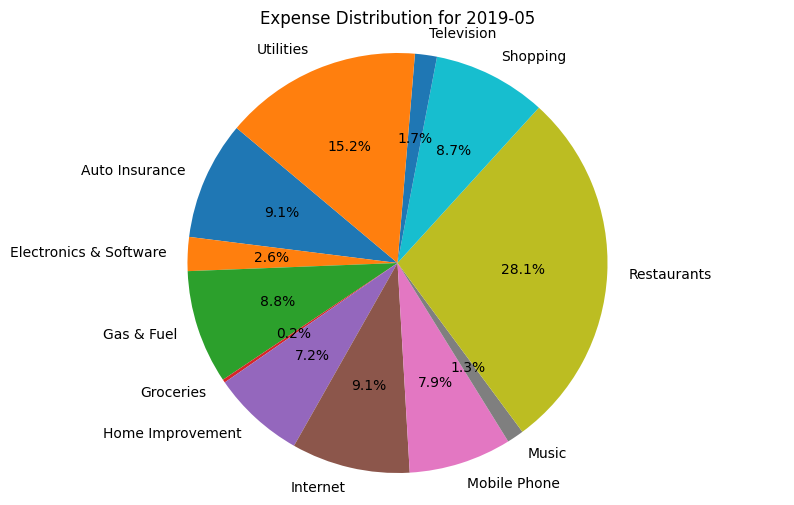

Budget Insights for 2019-05
Auto Insurance: within budget
Electronics & Software: $21.39 over budget
Gas & Fuel: within budget
Groceries: within budget
Home Improvement: within budget
Internet: within budget
Mobile Phone: within budget
Music: within budget
Restaurants: $80.98 over budget
Shopping: within budget
Television: within budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $294.28




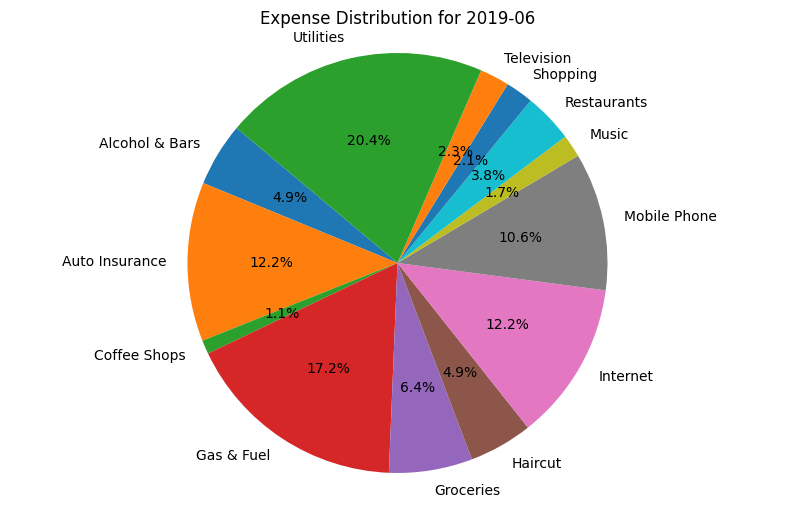

Budget Insights for 2019-06
Alcohol & Bars: $30.00 over budget
Auto Insurance: within budget
Coffee Shops: within budget
Gas & Fuel: $30.63 over budget
Groceries: within budget
Haircut: within budget
Internet: within budget
Mobile Phone: within budget
Music: within budget
Restaurants: within budget
Shopping: within budget
Television: within budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $298.62




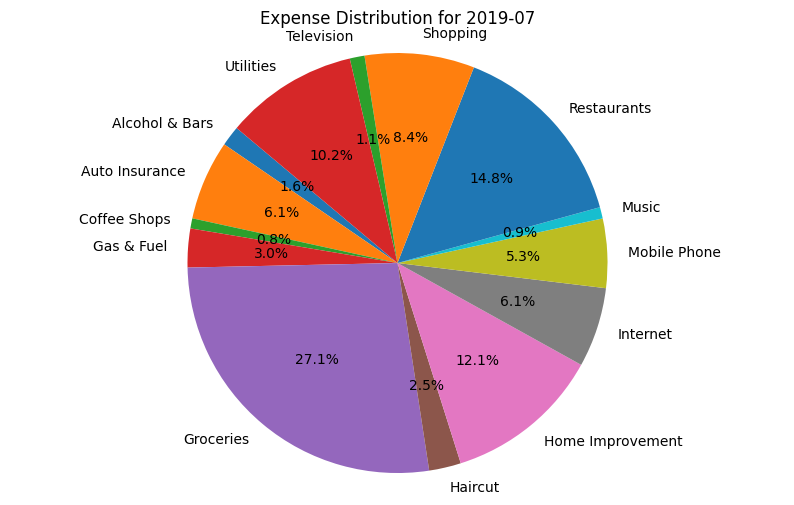

Budget Insights for 2019-07
Alcohol & Bars: $19.00 over budget
Auto Insurance: within budget
Coffee Shops: within budget
Gas & Fuel: within budget
Groceries: $180.54 over budget
Haircut: within budget
Home Improvement: within budget
Internet: within budget
Mobile Phone: within budget
Music: within budget
Restaurants: $30.64 over budget
Shopping: $3.08 over budget
Television: within budget
Utilities: within budget
Overall: Over budget
Extra Amount spent: $60.22




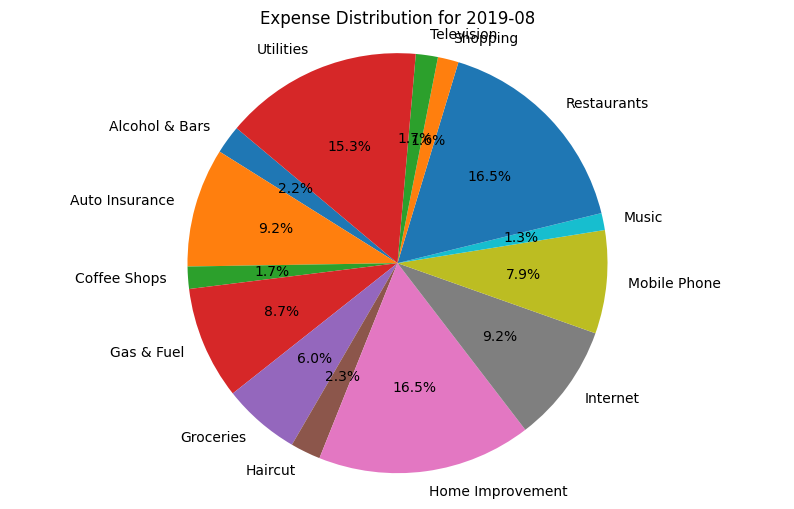

Budget Insights for 2019-08
Alcohol & Bars: $18.00 over budget
Auto Insurance: within budget
Coffee Shops: within budget
Gas & Fuel: within budget
Groceries: within budget
Haircut: within budget
Home Improvement: within budget
Internet: within budget
Mobile Phone: within budget
Music: within budget
Restaurants: within budget
Shopping: within budget
Television: within budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $342.80




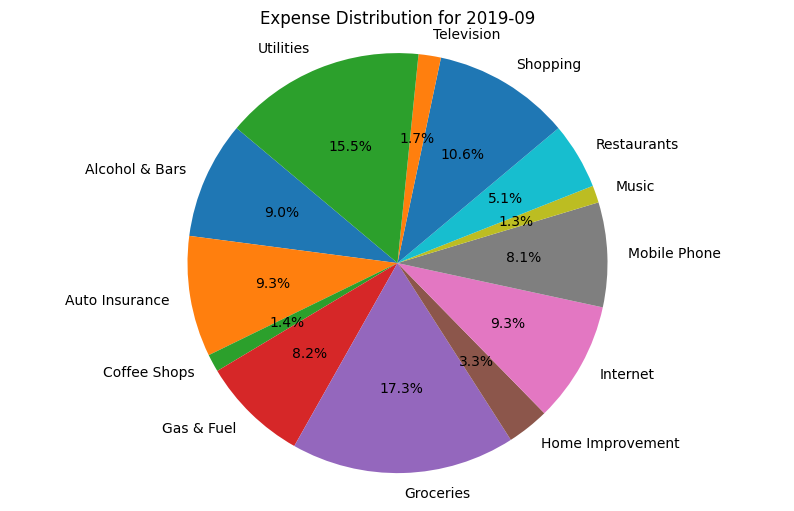

Budget Insights for 2019-09
Alcohol & Bars: $72.98 over budget
Auto Insurance: within budget
Coffee Shops: within budget
Gas & Fuel: within budget
Groceries: within budget
Home Improvement: within budget
Internet: within budget
Mobile Phone: within budget
Music: within budget
Restaurants: within budget
Shopping: within budget
Television: within budget
Utilities: within budget
Overall: Within budget
Remaining Amount: $323.82




In [31]:
for month_year in monthly_expenses['Month_Year'].unique():
    monthly_data = monthly_expenses[monthly_expenses['Month_Year'] == month_year]
    over_budget_data = budget_insights_df[budget_insights_df['Month_Year'] == month_year]

    plt.figure(figsize=(10, 6))
    plt.pie(monthly_data['Amount'], labels=monthly_data['Category'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Expense Distribution for {month_year}')
    plt.axis('equal')
    plt.show()

    print(f"Budget Insights for {month_year}")
    for _, row in over_budget_data.iterrows():
        category = row['Category']
        amount = row['Difference']
        status = row['Status']
        if status == 'Over Budget':
            print(f"{category}: ${amount:.2f} over budget")
        else:
            print(f"{category}: within budget")

    total_overspent = over_budget_data[over_budget_data['Status'] == 'Over Budget']['Difference'].sum()
    total_underspent = over_budget_data[over_budget_data['Status'] == 'Within Budget']['Difference'].sum()
    net_difference = total_overspent - total_underspent
    if net_difference > 0:
        print("Overall: Over budget")
        print(f"Extra Amount spent: ${net_difference:.2f}")
    else:
        print("Overall: Within budget")
        print(f"Remaining Amount: ${abs(net_difference):.2f}")
    print("\n")

### **Predicting Future Expenses using Gradient Boosting Regression**

In [32]:
new_df.head()

,Date,Description,Amount,Category,Account Name
0,2018-01-01,Amazon,11.11,Shopping,Platinum Card
1,2018-01-02,Thai Restaurant,24.22,Restaurants,Silver Card
2,2018-01-04,Netflix,11.76,Movies & DVDs,Platinum Card
3,2018-01-05,American Tavern,25.85,Restaurants,Silver Card
4,2018-01-06,Hardware Store,18.45,Home Improvement,Silver Card


In [33]:
# Extract features from 'Date'
new_df['Year'] = new_df['Date'].dt.year
new_df['Month'] = new_df['Date'].dt.month
new_df['Day'] = new_df['Date'].dt.day
new_df['DayOfWeek'] = new_df['Date'].dt.dayofweek

# Encode categorical variables using one-hot encoding
new_df = pd.get_dummies(new_df, columns=['Description',  'Category', 'Account Name'], drop_first=True)

# Define features and target
X = new_df.drop(columns=['Date', 'Amount'])
y = new_df['Amount']

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regression model
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = model_gb.predict(X_test)

# Calculate Mean Squared Error and R-squared value
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting R-squared: {model_gb.score(X_test, y_test)}')

Gradient Boosting Mean Squared Error: 333.44192988478943
Gradient Boosting R-squared: 0.40572806839554054


**Visualization of Predicted Amount vs Actual Amount**



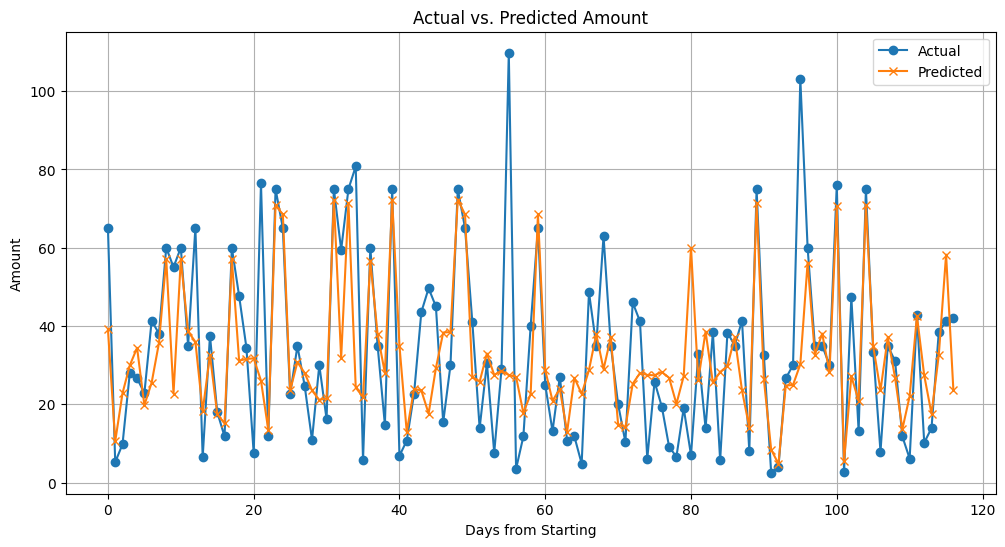

In [35]:
# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb})
plot_df.reset_index(inplace=True)
plot_df['Days'] = plot_df.index

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(plot_df['Days'], plot_df['Actual'], label='Actual', marker='o')
plt.plot(plot_df['Days'], plot_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Days from Starting')
plt.ylabel('Amount')
plt.title('Actual vs. Predicted Amount')
plt.legend()
plt.grid(True)
plt.show()

**Prediction of Future Expenses**

In [36]:
# Prepare future dates for prediction
future_dates = pd.date_range(start='2019-10-01', periods=30)
future_df = pd.DataFrame(future_dates, columns=['Date'])
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Day'] = future_df['Date'].dt.day
future_df['DayOfWeek'] = future_df['Date'].dt.dayofweek

# Add missing columns to match the training data and fill with zeros
for column in X.columns:
    if column not in future_df.columns:
        future_df[column] = 0

# Predict future expenses
future_predictions = model_gb.predict(future_df.drop(columns=['Date']))

# Output the predictions
future_df['Predicted Amount'] = future_predictions
print(future_df[['Date', 'Predicted Amount']])

         Date  Predicted Amount
0  2019-10-01         58.165376
1  2019-10-02         62.321982
2  2019-10-03         62.321982
3  2019-10-04         61.588580
4  2019-10-05         61.588580
5  2019-10-06         61.588580
6  2019-10-07         63.127525
7  2019-10-08         62.422862
8  2019-10-09         59.607138
9  2019-10-10         63.715072
10 2019-10-11         62.981670
11 2019-10-12         62.981670
12 2019-10-13         62.981670
13 2019-10-14         64.520616
14 2019-10-15         63.715072
15 2019-10-16         63.715072
16 2019-10-17         63.715072
17 2019-10-18         62.981670
18 2019-10-19         62.981670
19 2019-10-20         62.981670
20 2019-10-21         64.520616
21 2019-10-22         63.715072
22 2019-10-23         63.715072
23 2019-10-24         63.715072
24 2019-10-25         62.981670
25 2019-10-26         62.981670
26 2019-10-27         62.981670
27 2019-10-28         64.520616
28 2019-10-29         63.715072
29 2019-10-30         63.715072


**Plotting Future Predictions**

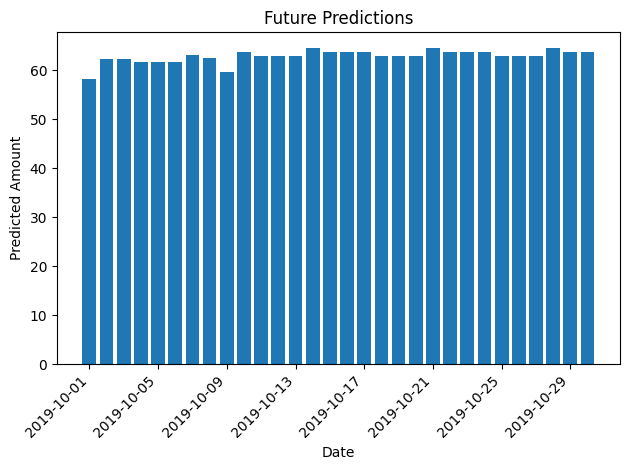

In [37]:
plt.bar(future_df['Date'], future_df['Predicted Amount'])
plt.xlabel('Date')
plt.ylabel('Predicted Amount')
plt.title('Future Predictions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()